# Loading Data

In [3]:
from sklearn.datasets import load_digits
digits_dt=load_digits()

print("Shape of imported dataset is ->",digits_dt.images.shape)

Shape of imported dataset is -> (1797, 8, 8)


# Visualising Dataset

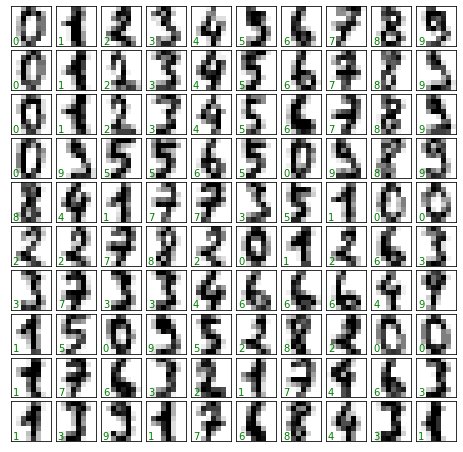

In [87]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits_dt.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits_dt.target[i]),transform=ax.transAxes,color='green')

In [15]:
X=digits_dt.data
X.shape

(1797, 64)

In [16]:
y=digits_dt.target
y.shape

(1797,)

# Dimesionality Reduction

In [17]:
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
iso.fit(X)
data_projected=iso.transform(X)
data_projected.shape

(1797, 2)

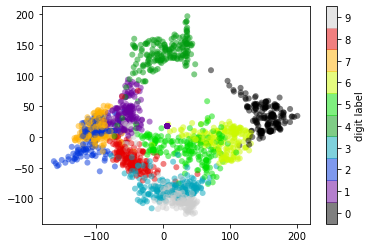

In [22]:
plt.scatter(data_projected[:,0],data_projected[:,1],c=y,edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-0.5,9.5)

# Classification On Digits

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_model=model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_model)

0.8333333333333334

Text(91.68, 0.5, 'true label')

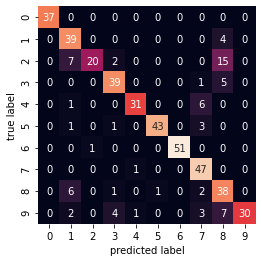

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat=confusion_matrix(y_test,y_model)

sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label')

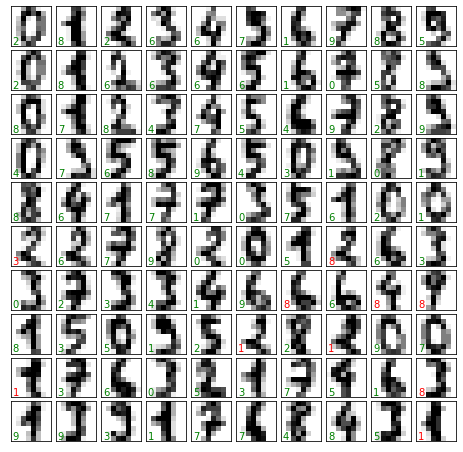

In [34]:
fig,axes=plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits_dt.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(y_model[i]),transform=ax.transAxes,color='green' if (y_test[i]==y_model[i]) else 'red')

# Exploring the above Code In depth 

In [37]:
import sklearn
dig_dt= sklearn.datasets.load_digits()


In [44]:
print('Feature names in dataset are as follows: {0} and length of feature list is {1}'.format( dig_dt.feature_names,len(dig_dt.feature_names)))

Feature names in dataset are as follows: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'] and length of feature list is 64


In [45]:
print('The names of target classes are as follow:->', dig_dt.target_names)

The names of target classes are as follow:-> [0 1 2 3 4 5 6 7 8 9]


In [46]:
dig_dt.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

Image is of:- 0


<Figure size 432x288 with 0 Axes>

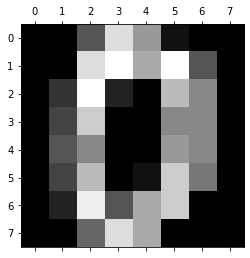

In [57]:
plt.gray()
plt.matshow(dig_dt.images[0])
print("Image is of:-",dig_dt.target[0])
plt.show()

Image is of:- 4


<Figure size 432x288 with 0 Axes>

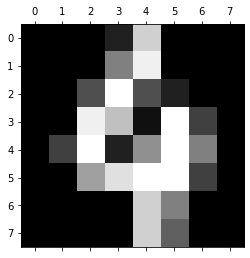

In [56]:
plt.gray()
plt.matshow(dig_dt.images[100])
print("Image is of:-",dig_dt.target[100])
plt.show()

Image is of:- 8


<Figure size 432x288 with 0 Axes>

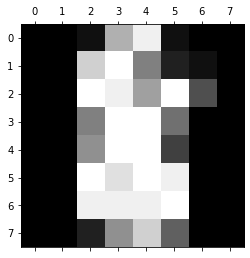

In [58]:
plt.gray()
plt.matshow(dig_dt.images[1794])
print("Image is of:-",dig_dt.target[1794])
plt.show()

In [62]:
import numpy as np
arr_2d=np.arange(5,105,5).reshape(4,5)
arr_2d

array([[  5,  10,  15,  20,  25],
       [ 30,  35,  40,  45,  50],
       [ 55,  60,  65,  70,  75],
       [ 80,  85,  90,  95, 100]])

In [63]:
for en_tup in enumerate(arr_2d):
    print(en_tup)

(0, array([ 5, 10, 15, 20, 25]))
(1, array([30, 35, 40, 45, 50]))
(2, array([55, 60, 65, 70, 75]))
(3, array([ 80,  85,  90,  95, 100]))


In [64]:
for en_tup in enumerate(arr_2d.flat):
    print(en_tup)

(0, 5)
(1, 10)
(2, 15)
(3, 20)
(4, 25)
(5, 30)
(6, 35)
(7, 40)
(8, 45)
(9, 50)
(10, 55)
(11, 60)
(12, 65)
(13, 70)
(14, 75)
(15, 80)
(16, 85)
(17, 90)
(18, 95)
(19, 100)


In [67]:
for i,val in enumerate(arr_2d.flat,1):
    print((i,val))

(1, 5)
(2, 10)
(3, 15)
(4, 20)
(5, 25)
(6, 30)
(7, 35)
(8, 40)
(9, 45)
(10, 50)
(11, 55)
(12, 60)
(13, 65)
(14, 70)
(15, 75)
(16, 80)
(17, 85)
(18, 90)
(19, 95)
(20, 100)


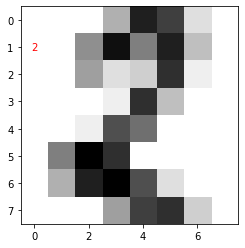

In [104]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax.imshow(dig_dt.images[50],cmap='binary',interpolation='nearest')
ax.text(0.05,0.8,str(dig_dt.target[50]),color='red',transform=ax.transAxes)
plt.show()

[[0 0 1]
 [1 1 0]
 [0 1 2]]


Text(83.40000000000006, 0.5, 'True value')

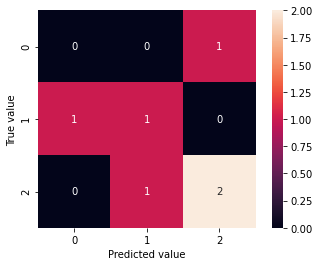

In [3]:
from sklearn.metrics import confusion_matrix
y_true=[2,2,1,2,0,1]
y_pred=[1,2,1,2,2,0]
mat=confusion_matrix(y_true,y_pred)
print(mat)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mat,square=True,annot=True)
plt.xlabel('Predicted value')
plt.ylabel('True value')